![Traffic lights over urban intersection.](traffic.jpg)

**Challenges in Traffic Sign Management**

Traffic signs convey vital information to drivers. However, their effectiveness can be hindered by various factors, such as their visibility under different lighting conditions or the presence of obstructions.


**Training Traffic Sign Detection Models**

To address these challenges and enhance stop sign and traffic light detection capabilities, advanced technologies such as deep learning and computer vision have gained significant attention. In this project, you'll train an object detection model on 6 images of stop signs and 6 images of traffic lights, taken from various angles and lighting conditions. This training teaches the model to classify and locate these signs in images, improving its robustness and reliability for real-world applications.

(-0.5, 223.5, 223.5, -0.5)

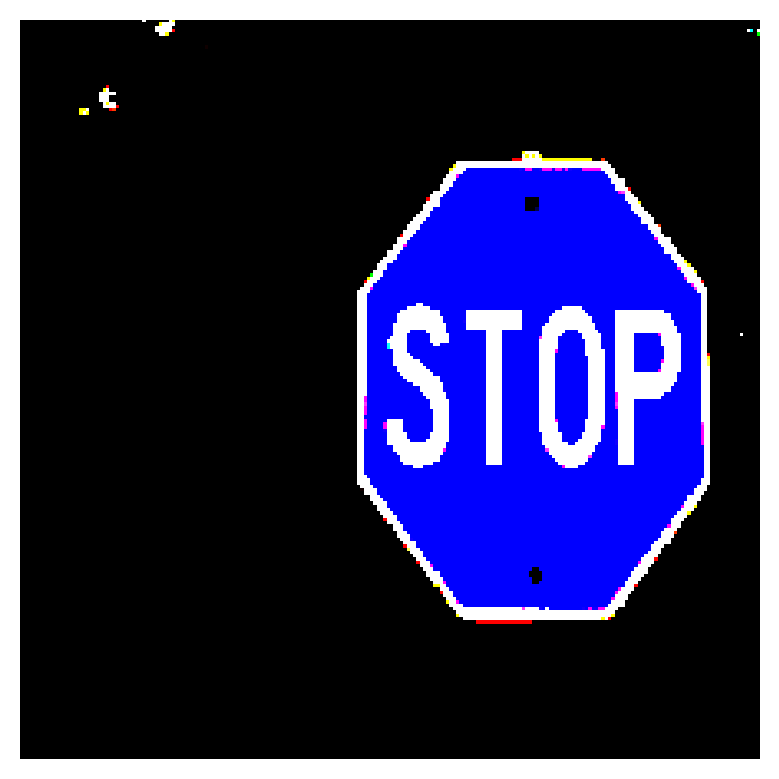

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Load preprocessed images and the corresponding labels
image, labels = np.load('batch.npy',allow_pickle=True).tolist()

# hyperparameters
input_size = image.shape[1] # dimension of input image
num_classes = labels['classifier_head'].shape[1] # number of classes
DROPOUT_FACTOR = 0.2 # dropout probability

# visualize one example preprocessed image
plt.imshow(image[2])
plt.axis("off")

## Define and train an object detection model to identify traffic signs and lights

In [2]:
# Define the object detection model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(input_size, input_size, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.Dropout(DROPOUT_FACTOR),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(DROPOUT_FACTOR),
    keras.layers.Dense(num_classes, activation='softmax')
])

2024-11-14 11:48:00.162387: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [4]:
# Train the model
history = model.fit(
    image,
    labels['classifier_head'],
    epochs=20,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 7.2197 - accuracy: 0.5556 - val_loss: 4091.2031 - val_accuracy: 0.6667
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 3219.8867 - accuracy: 0.4444 - val_loss: 859.0146 - val_accuracy: 0.3333
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 575.1327 - accuracy: 0.6667 - val_loss: 454.5114 - val_accuracy: 0.3333
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 286.8004 - accuracy: 0.6667 - val_loss: 177.8972 - val_accuracy: 0.6667
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 33.4902 - accuracy: 0.8889 - val_loss: 428.3440 - val_accuracy: 0.6667
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 141.9735 - accuracy: 0.5556 - val_loss: 120.9516 - val_accuracy: 0.6667
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 21.9736 - accuracy: 0.8889 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 8/20
1/

In [5]:
# Save the training accuracy in a variable named accuracy
accuracy = history.history['accuracy'][-1]

print(f'Training Accuracy: {accuracy}')

Training Accuracy: 1.0
